## Near Duplicate Detection With Image Vectors

In [29]:
import imp
import ndd
imp.reload(ndd)
event = "hiking"
album = "696"

input_directory = "/notebooks/datasets/pec/images/%s/%s/" % (event,album)
similarity_rate = 0.9

cluster = ndd.get_cluster_list(input_directory,similarity_rate)

/notebooks/datasets/pec/images/hiking/696/47235.jpg
Found 186 images


In [26]:
a = [1,2,3]
b = [2,3,4]
c = a + b
print (c)

[1, 2, 3, 2, 3, 4]


In [34]:
cluster_list = []
for c in cluster:
    print(c.similar_images)
#     cluster_list.append(c.index_image_path + c.similar_images))

['/notebooks/datasets/pec/images/hiking/696/47242.jpg']
['/notebooks/datasets/pec/images/hiking/696/47289.jpg']
['/notebooks/datasets/pec/images/hiking/696/47182.jpg']
['/notebooks/datasets/pec/images/hiking/696/47215.jpg']
['/notebooks/datasets/pec/images/hiking/696/47299.jpg']


In [16]:
imp.reload(ndd)
ndd.show_cluster(cluster_list)

({0: interactive(children=(Dropdown(description='x_0', options=('/notebooks/datasets/pec/images/hiking/696/47241.jpg', '/notebooks/datasets/pec/images/hiking/696/47242.jpg'), value='/notebooks/datasets/pec/images/hiking/696/47241.jpg'), Output()), _dom_classes=('widget-interact',)),
  1: interactive(children=(Dropdown(description='x_1', options=('/notebooks/datasets/pec/images/hiking/696/47288.jpg', '/notebooks/datasets/pec/images/hiking/696/47289.jpg'), value='/notebooks/datasets/pec/images/hiking/696/47288.jpg'), Output()), _dom_classes=('widget-interact',)),
  2: interactive(children=(Dropdown(description='x_2', options=('/notebooks/datasets/pec/images/hiking/696/47181.jpg', '/notebooks/datasets/pec/images/hiking/696/47182.jpg'), value='/notebooks/datasets/pec/images/hiking/696/47181.jpg'), Output()), _dom_classes=('widget-interact',)),
  3: interactive(children=(Dropdown(description='x_3', options=('/notebooks/datasets/pec/images/hiking/696/47216.jpg', '/notebooks/datasets/pec/imag

In [2]:

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.preprocessing.image import load_img

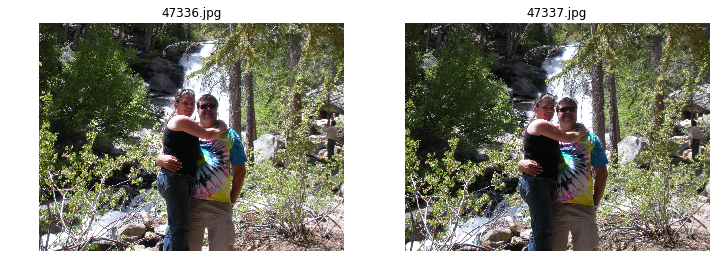

interactive(children=(Dropdown(description='x_0', options=('47336.jpg', '47337.jpg'), value='47336.jpg'), Outp…

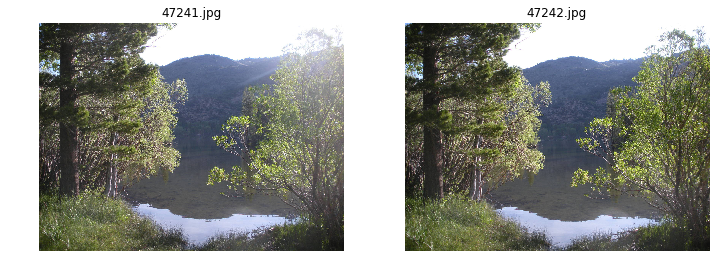

interactive(children=(Dropdown(description='x_1', options=('47241.jpg', '47242.jpg'), value='47241.jpg'), Outp…

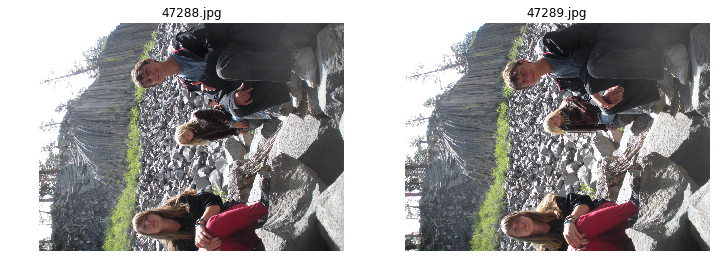

interactive(children=(Dropdown(description='x_2', options=('47288.jpg', '47289.jpg'), value='47288.jpg'), Outp…

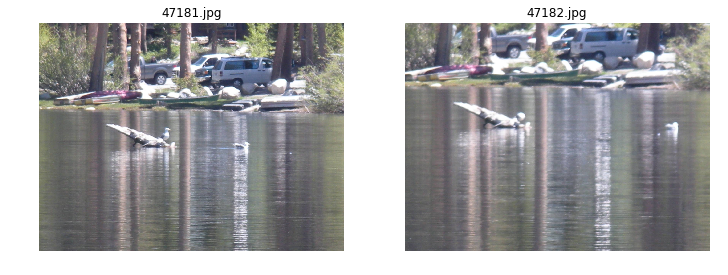

interactive(children=(Dropdown(description='x_3', options=('47181.jpg', '47182.jpg'), value='47181.jpg'), Outp…

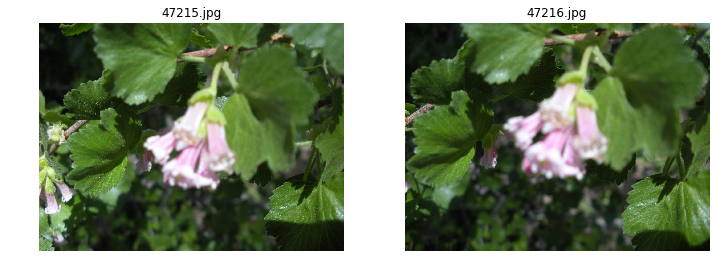

interactive(children=(Dropdown(description='x_4', options=('47215.jpg', '47216.jpg'), value='47215.jpg'), Outp…

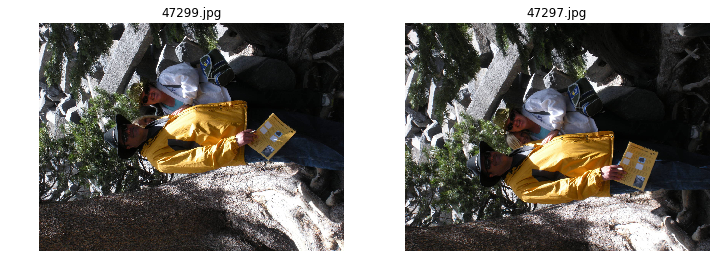

interactive(children=(Dropdown(description='x_5', options=('47299.jpg', '47297.jpg'), value='47299.jpg'), Outp…

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import sys
sys.path.insert(1,'../utils/')
from utils import show_images

doubles_widgets = {}
doubles = []
i = 0
for e in cluster_list:
    image_list = [e.index_image_path, *(e.similar_images)]
    
    auswahl = "" 
    for x in image_list:
        doubles.append(os.path.basename(x))
        auswahl += "'" + os.path.basename(x) + "',"
    auswahl = auswahl [:-1]
    
    exec("def f_%s(x_%s):return x_%s" % (i,i,i))
    exec("doubles_widgets[%s]=(interactive(f_%s,x_%s=[%s]))" % (i,i,i,auswahl))
    
    show_images(image_list, titles=image_list)
    display(doubles_widgets[i])
        
    i += 1

In [35]:
import shutil

new_directory = "results/%s_%s" % (event,album)


images_without_doubles = []
for x in image_filenames:
    if os.path.basename(x) not in doubles:
        images_without_doubles.append(os.path.basename(x))

for x in doubles_widgets:
    images_without_doubles.append(doubles_widgets[x].result)

try:
    os.mkdir(new_directory)
    for x in images_without_doubles:
        image_path = os.path.join(input_directory,x)
        shutil.copy2(image_path,new_directory)
except: 
    print("directory already created")    